In [ ]:
!pip install beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd
#import schedule
import time
from datetime import datetime

# Function to get individual article details from its URL
def get_article_details(article_url):
    try:
        # Fetch the article page HTML content
        response = requests.get(article_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the title from the 'data-title' attribute in the sharethis div
        share_div = soup.find('div', class_='sharethis-inline-share-buttons')
        if share_div and share_div.has_attr('data-title'):
            title = share_div['data-title']
        else:
            title = 'No title found'

        # Extract the date from the specific date div
        date_div = soup.find('div', class_='date text-14 lh-20 color-iron')
        if date_div:
            # Get the text before <br> for the date
            date = date_div.get_text(strip=True).split('সর্বশেষ')[0].strip()
        else:
            date = 'No date found'

        # Extract the URL from the 'data-url' attribute
        if share_div and share_div.has_attr('data-url'):
            article_url = share_div['data-url']
        else:
            article_url = 'No URL found'

        # Extract article content specifically from <p class="rtejustify"> elements
        content_paragraphs = soup.find_all('p', class_='rtejustify')
        article_text = ' '.join([p.get_text(strip=True) for p in content_paragraphs])

        if not article_text:  # If no text is found, return fallback message
            article_text = 'No article text found'

        return title, date, article_text, article_url

    except Exception as e:
        print(f"Error fetching article details from {article_url}: {e}")
        return 'No title', 'No date', 'No text', 'No URL'

# Function to scrape a single category
def scrape_category(category_name, category_url):
    try:
        response = requests.get(category_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all article links on the category page
        articles = soup.find_all('h3', class_='title')

        news_data = []

        for article in articles:
            try:
                # Extract the article link from the title
                article_url = article.find('a')['href']
                full_article_url = f'https://bangla.thedailystar.net{article_url}'

                # Fetch article details (title, date, text)
                title, date, news_text, link = get_article_details(full_article_url)

                # Append the news data
                news_data.append({
                    'title': title,
                    'date': date,
                    'category': category_name,
                    'news_text': news_text,
                    'link': link
                })

            except Exception as e:
                print(f"Error processing article in {category_name}: {e}")
                continue

        return news_data

    except Exception as e:
        print(f"Error scraping category {category_name}: {e}")
        return []

# Function to get all categories from the navigation menu
def get_category_links(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all category links in the navigation menu
        categories = soup.find('ul', class_='menu')  # Adjust this selector if needed
        category_links = {}

        if categories:
            for li in categories.find_all('li'):
                a_tag = li.find('a')
                if a_tag and 'href' in a_tag.attrs:
                    category_name = a_tag.get_text(strip=True)
                    category_url = f"https://bangla.thedailystar.net{a_tag['href']}"
                    category_links[category_name] = category_url

        return category_links

    except Exception as e:
        print(f"Error fetching category links: {e}")
        return {}

# Main function to scrape all categories
def scrape_all_categories(main_url):
    # Get the list of categories
    categories = get_category_links(main_url)

    all_news = []

    for category_name, category_url in categories.items():
        print(f"Scraping category: {category_name}")
        # Scrape each category and extend the news list
        news_data = scrape_category(category_name, category_url)
        all_news.extend(news_data)

    return all_news

# Main website URL
main_url = 'https://bangla.thedailystar.net/'

# Scrape all categories
all_news_data = scrape_all_categories(main_url)

# Convert to DataFrame for better visualization
df = pd.DataFrame(all_news_data)

# Save to a CSV file if needed
df.to_csv('archive.csv', index=False)

print("Scraping completed and data saved to 'daily_star_bangla_news_by_category.csv'.")


Scraping category: বাংলাদেশ
Scraping category: আন্তর্জাতিক
Scraping category: মতামত
Scraping category: স্বাস্থ্য
Scraping category: খেলা
Scraping category: বাণিজ্য
Scraping category: বিনোদন
Scraping category: জীবনযাপন
Scraping category: সাহিত্য
Scraping category: শিক্ষা
Scraping category: প্রযুক্তি
Scraping category: প্রবাসে
Scraping completed and data saved to 'daily_star_bangla_news_by_category.csv'.


In [ ]:
df.to_csv('daily_star_update.csv')


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
#import schedule
import time
from datetime import datetime

def get_article_details(article_url):
    try:
        # Fetch the article page HTML content
        response = requests.get(article_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the title from the 'data-title' attribute in the sharethis div
        share_div = soup.find('div', class_='sharethis-inline-share-buttons')
        if share_div and share_div.has_attr('data-title'):
            title = share_div['data-title']
        else:
            title = 'No title found'

        # Extract the date from the specific date div
        date_div = soup.find('div', class_='date text-14 lh-20 color-iron')
        if date_div:
            # Get the text before <br> for the date
            date = date_div.get_text(strip=True).split('সর্বশেষ')[0].strip()
        else:
            date = 'No date found'

        # Extract the URL from the 'data-url' attribute
        if share_div and share_div.has_attr('data-url'):
            article_url = share_div['data-url']
        else:
            article_url = 'No URL found'

        # Extract article content specifically from <p class="rtejustify"> elements
        content_paragraphs = soup.find_all('p', class_='rtejustify')
        article_text = ' '.join([p.get_text(strip=True) for p in content_paragraphs])

        if not article_text:  # If no text is found, return fallback message
            article_text = 'No article text found'

        return title, date, article_text, article_url

    except Exception as e:
        print(f"Error fetching article details from {article_url}: {e}")
        return 'No title', 'No date', 'No text', 'No URL'

def scrape_daily_star():
    base_url = "https://bangla.thedailystar.net"
    main_page_url = f"{base_url}/todays-news"
    try:
        # Fetch the main page
        response = requests.get(main_page_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract all article titles and URLs
        articles = soup.find_all('h3', class_='title')
        articles_data = []

        for article in articles:
            link = article.find('a')
            if link and link.has_attr('href'):
                article_url = link['href']
                # Prepend base URL if the URL is relative
                if not article_url.startswith('http'):
                    article_url = f"{base_url}{article_url}"

                title, date, article_text, article_url = get_article_details(article_url)
                articles_data.append({
                    'title': title,
                    'date': date,
                    'text': article_text,
                    'url': article_url
                })

        # Convert to DataFrame and save to CSV
        df = pd.DataFrame(articles_data)
        #df.to_csv(f"daily_star_articles_{datetime.now().date()}.csv", index=False, encoding='utf-8')
        df.to_csv("current_date.csv", index=False, encoding='utf-8')
        print(f"Scraped {len(articles_data)} articles.")

    except Exception as e:
        print(f"Error scraping Daily Star: {e}")


# Schedule the scraping function to run daily at 10 AM
'''
schedule.every().day.at("10:00").do(scrape_daily_star)

# Keep the script running
while True:
    schedule.run_pending()
    time.sleep(60)  # wait a minute before checking again
df['news_text'] '''

scrape_daily_star()

Scraped 36 articles.


In [ ]:
!pip install schedule

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


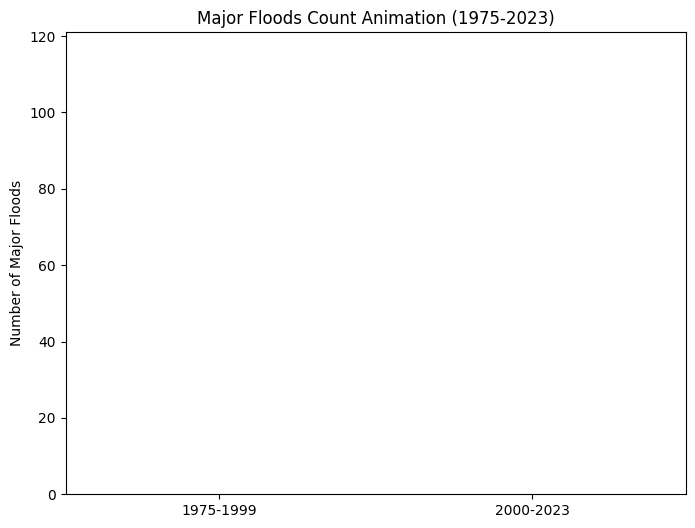

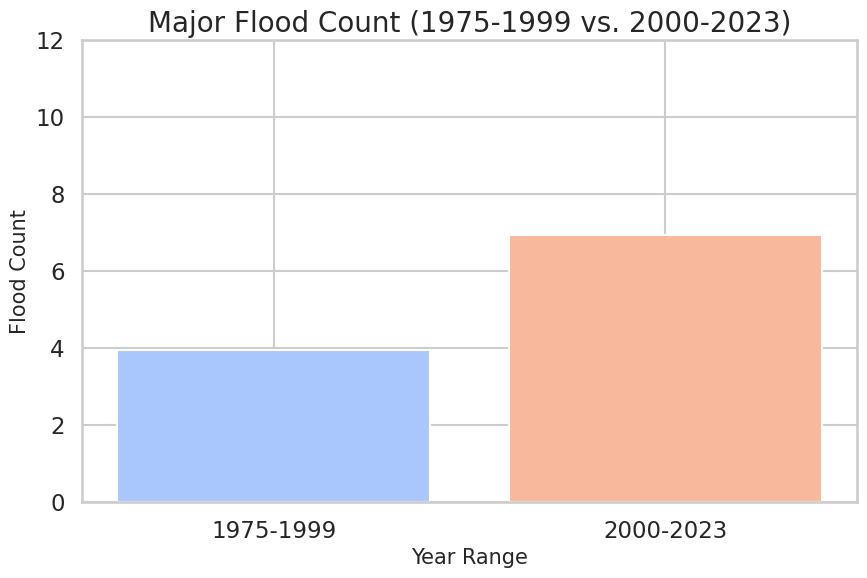

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Sample data for major flood count
data = {
    'Year Range': ['1975-1999', '2000-2023'],
    'Major Flood Count': [4, 7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the seaborn style
sns.set(style="whitegrid", context="talk")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the bar plot with zero heights
bars = ax.bar(df['Year Range'], [0, 0], color=sns.color_palette('coolwarm', n_colors=2))

# Set titles and labels
ax.set_title("Major Flood Count (1975-1999 vs. 2000-2023)", fontsize=20)
ax.set_xlabel("Year Range", fontsize=15)
ax.set_ylabel("Flood Count", fontsize=15)

# Set the y-axis limit
ax.set_ylim(0, max(df['Major Flood Count']) + 5)

# Animation function to gradually increase the bar height
def animate(frame):
    for i, bar in enumerate(bars):
        # Gradually increase the height of each bar based on the frame
        bar.set_height(df['Major Flood Count'][i] * frame / 100)
    return bars

# Create animation, where frames will span over 100 frames (5 seconds at 20 FPS)
ani = FuncAnimation(fig, animate, frames=100, interval=1000, repeat=False)

# Save the animation as a gif (optional, if you want to save the output)
ani.save("/content/major_flood_count_animation_final2.gif", writer='pillow', fps=20)

# Display the animation
plt.show()
